# Tutorial 2c - *Code Modifications (Workflow + Simulation)*

This tutorial is an introduction to:
1- How to make simple code modifications?
2- Familizing yourself with **Git** and **Github** workflow and terminology.
________________________
<div>
    <img src="https://git-scm.com/images/logos/downloads/Git-Icon-1788C.png" 
         style="float:left; padding-right:10px; width:60px; height:60px;" />
</div>
<strong>Git</strong> is an open-source version control software to track your changes in the source code.

<br><br>


<div>
    <img src="https://github.com/NCAR/CTSM-Tutorial-2022/raw/main/images/github.png" 
         style="float:left; padding-right:10px; width:60px; height:60px;" />
</div>
<strong>GitHub</strong> provides a centralized online service to host the source code and version control using Git.
<br><br>



This tutorial provides a hands-on tutorial for Git and GitHub: 
https://swcarpentry.github.io/git-novice/

<div class="alert alert-block alert-info">

<b> TIP:</b> You should have some familiarity with the suggested CTSM workflow with Git that we'll go over here before attempting any code modifications on your own.

</div>

In this tutorial, we assume you have already cloned CTSM repository as stated in [Day0a_GitStarted.ipynb](Day0a_GitStarted.ipynb). 

It is recommended that you go through the [Day0b_NEON_Simulation_Tutorial.ipynb](Day0b_NEON_Simulation_Tutorial.ipynb) tutorial and run simulations for KONZ, so that you can compare the results of the modified code with the original code. 


## 1- Check the cloned CTSM repository

First navigate to your cloned CTSM repository:


In [ ]:
cd ~/CTSM/

Next, check the status of your clone on the cloud. 
The command below shows if you have already made any changes to your code in the cloud:

In [ ]:
git status

If you have already made any changes to your code, it will show up as the output of `git status`. 

You can see what changes you have aleady made to the code by running the following:

In [ ]:
git diff

If you have been following this tutorial consecutively, you should have a clean copy of the repository on this machine. 

## 2- Create a branch for your code modifications

Now we want to create a git branch for our code modifications. A branch in GitHub terminology is a way to keep making modifications and developing new features to the codes and not changing the main part of the code. With a branch, we are making another line of development for the code without changing anything in the `main` branch, where the original code is located.


<div class="alert alert-block alert-info">
<b>NOTE: </b> 
    A <code>branch</code> of a repository is a copy of the original <code>main</code> branch (similar to branches in a tree). Branches allow you to preserve the main code (the 'main'  branch), make a copy (a new branch) and then work within that new branch.
</div>

Next, let's create a branch for your development called (`phenology_change`):

In [ ]:
git checkout -b phenology_change

In [ ]:
git status

<div class="alert alert-block alert-info">
<b>NOTE: </b> 
 GitHub branches give us the flexibility to work on the same code base at the same time while keep tracking of who and where things have changed. When playing a video game, we save our progress at checkpoints, so in future we can go back to these points and start from specific part of the game. Similarly, Git and Github give us the flexibility to save snapshots of the code, so we can revert back to these snapshots. The image below shows how different branches might be developed at the same time and merged back with each other.
</div>

![github](https://nvie.com/img/main-branches@2x.png)

## 3- Make your code modifications

Now that you have a`branch` of the code, you can start changing the code. 

In this tutorial, we are going to change the rain threshhold for leaf onset and compare the results for Konza Prairie Biological Station (KONZ).


<div class="alert alert-block alert-warning">

<b> WARNING: </b> If you are interested in comparing the results from modified code with original code, you should make sure you have already run the original CTSM code base for your tower of interest (e.g. KONZ). 

</div>


To find more information about KONZ site, please NEON's website: https://www.neonscience.org/field-sites/konz
    
    
**Quesions:** 
- Where is Konza Prairie Biological Station located? 
- What kind of behavior do we expect by changing the rain threshhold for leaf onset in this site? 
    
The codes of CTSM model are located under `src` directory.
    
You can navigate to `src` directory and check the content of it:

In [ ]:
cd ~/CTSM/src

In [ ]:
ls 

As you can see there are multiple directories and multiple files listed in this directory.

<div class="alert alert-success">
  <strong>Fun Fact:</strong> There is roughly ~252,919 lines of Fortran code in CTSM repository. 
</div>

In this example, we are making these code modifications in `src/biogeochem/CNPhenologyMod.F90`. 
    
First, let's navigate to this directory:

In [ ]:
cd ~/CTSM/src/biogeochem
pwd

List all the files in this directory: 

In [ ]:
ls

Here we are modifying `rain_threshold` in `~/CTSM/src/biogeochem/CNPhenologyMod.F90`.

From your side bar open up the files you'd like to modify by double clicking on the file.


<div class="alert alert-info">

<b>TIP:</b>  You can do this with any text editor. You can either use a terminal to open up <code>vim</code> or <code>emacs</code>, or you can do the following using JupyterLab sidebar:

</div>



 Navigate to `CTSM/src/biogeochem/CNPhenologyMod.F90` and open up the `CNPhenologyMod.F90` file by double clicking on the file:

![image1.png](https://github.com/NCAR/CTSM-Tutorial-2022/raw/main/images/file_listing_1.png)



It will open up the file under another tab:

![image2.png](https://github.com/NCAR/CTSM-Tutorial-2022/raw/main/images/file_listing_2.png)

This will open up a Fortran code, which you can read and edit. 

**Question:**
* Can you find what is the current value of `rain_threshhold`? You can look through the code to find this value. 

**Answer:**

The current value of `rain_threshold` is 20mm as specified in the line 1349 in the code:

```
rain_threshold = 20._r8 
```

_______
Now you can change the `rain_threshhold` to a lower or a higher value. 

For example:  the following modification will set the rain threshhold for leaf onset to 1mm. 
```
rain_threshold = 1._r8 

```

Now, **close and save** this file and navigate back to your notebook. Make sure to save before closing the file.



**Question:**
* How do you think changing this value will impact your simulations?

---

Let's quickly check that our code modes are reflected using git

In [ ]:
git diff ~/CTSM/src/biogeochem/CNPhenologyMod.F90

You should see that changes you made to `rain_threshold` reflected above.


## 4- Run CTSM simulation using your modifications:
In this step, you will test your modifications by running your own code.

You can do so by either:
1. Using `./run_neon.py` script. (easiest method)

2. Following the steps for running an unsuported single point case similar to [Day2a_GenericSinglePoint.ipynb](Day2a_GenericSinglePoint.ipynb).

 
<div class="alert alert-info">
  <strong> Reminder: </strong> <code> ./run_neon.py </code> is basically a user-friendly script that simplifies all the steps of running neon cases into one command.
</div>


Now, let's run CTSM simulation for our NEON site (e.g. KONZ) with these modifications. We are saving the output of this simulations in `~/scratch/CLM-NEON-phenologychange`. Creating a new output-root like this will allow us to test the changes at several sites.

In [ ]:
qcmd -- run_neon --neon-sites KONZ --output-root ~/scratch/CLM-NEON-phenologychange --overwrite

<div class="alert alert-block alert-warning">

<b>WARNING!</b> 
    
You should really do a full spinup after making code modifications.  But for this examples we're just going to have a quick look at changes in LAI and GPP that results from our phenology changes. This is a quick way to make sure the changes worked as intended BEFORE running an AD and post-AD spinup to generate a new initial conditions file.
</div>

## 5- Save your changes to your github branch

When you are happy with your changes, you should make sure you have commited these changes and submitted them to your GitHub repository. 

Easiest way to do so:


First run the following to find all the files that has been modified. You should see all the modified files here. 

In [ ]:
git status

Next add these file (or all files) to be saved:

In [ ]:
git add . 

Next commit your changes using a meaningful commit message:

In [ ]:
git commit -m "Changing rain threshhold for leaf onset to 1mm"

You can check your branch vs. the main branch to see the changes the submitted changes:

In [ ]:
git diff phenology_change origin/main

<div class="alert alert-success">
  <strong>Congratulations!</strong> Now you have successfully chande the rain threshhold for leaf onset and run the simulations for it. For visualizing the results, please check the next tutorial. 
</div>


Next, you can visualize the output of original simulation vs the modified code for KONZ site and compare it with evaluation files. 

In the next tutorial, we are going to work on visualizing the results of the modified code.  

**Go To [Day2d_CodeModification_Visualization.ipynb](Day2d_CodeModification_Visualization.ipynb)**

## [Optional] 6- Sharing your changes with others and pushing back your changes to GitHub Repository:

So far, we have made some changes and saved it a `local` branch; however, in real-life we usually want/need to push our changes back to GitHub so our collaborators can see and comment on our code or use our codes. 
Imagine saving your progress in a video game on a local computer, if you use another computer you can not load your progress in another computer. However, if you save your video game progress on a cloud, you can easily access it anywhere. Nowadays, video games save your progress via a profile/account. 

Similarly, **you need to create an account on GitHub to be able to push back your changes** so:
- you can access it from anywhere.
- you can share it with collaborators. 
- you can contribute back to CTSM repository. 

### 6-1 : Create a fork from CTSM repository

First, you need to create an account on [GitHub](github.com), if you don't already have an account there. Skip this if you already have an account on GitHub. 



### 6-2 : Create a fork from CTSM repository
For saving your progress via GitHub you need to create your own fork of the CTSM repository.You probably don't have access to write directly to the main CTSM repository (that right is reserved for the CTSM main software engineers). Therefore, you need your own copy of the repository to push your changes to:

<div class="alert alert-info">
  <strong> NOTE: </strong> 
    A fork is a copy of a repository. "Fork"ing a repository allows you to freely experiment with changes without affecting the original project. A normal user will not have the access to write to the CTSM original repository. Therefore, you need to create your own repository by creating your own fork of the original repository to push your changes.
</div>

You can create your own fork of the CTSM repository by using the fork button in the upper right corner of the CTSM reository page.

- Login to your GitHub account.
- Navigate to the original [CTSM repository](https://github.com/ESCOMP/CTSM) (escomp/CTSM).
- Use the `fork` button to create a fork of CTSM repository in your accoun

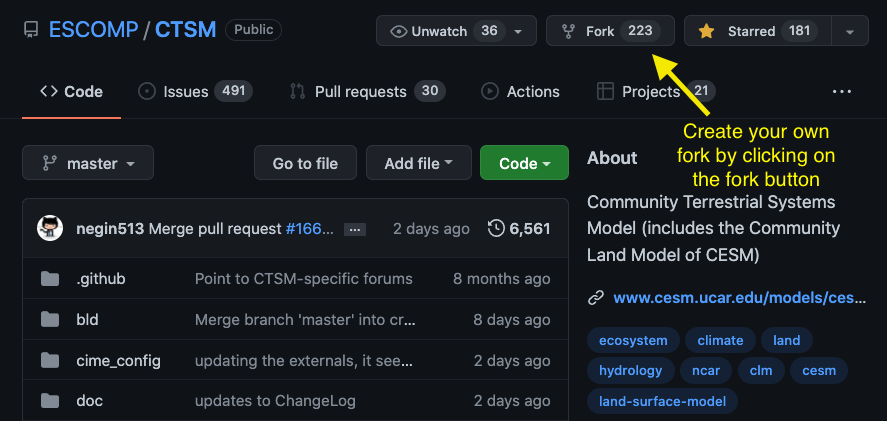

Your forked repository will be under your account name:

https://github.com/YOUR-USER-NAME/CTSM

For example, for the username (negin513) the forked repo is:

https://github.com/negin513/CTSM

You can make any modifications you'd like to your forked repository.

### 6-3: Pushing your changes to the outside world:
Now you have to connect your forked repository to this machine. You can do so by using the following:

<div class="alert alert-block alert-danger">

<b>WARNING!</b> 
    
Please replace "YOUR_USER_NAME" with your own GitHub username that you create in step 6-0 for the code below.
</div>

In [ ]:
git remote add YOUR_USER_NAME git@github.com:YOUR_USER_NAME/CTSM.git

In [ ]:
Finally push your changes to the remote repository:

In [ ]:
git push -u YOUR_USER_NAME phenology_change

To see your changes now you can go to your own fork and your own branch on [github.com](github.com) and see your recent changes.



### 6-4: Submitting a Pull Request:

In future, you might want to get your changes back to CTSM main branch, you will need to submit a GitHub Pull Request. 

Creating a Pull Request (PR) is easy and is a great way to contribute scientific changes to the community code.
To create a PR:

- Navigate to CTSM PR page on GitHub (https://github.com/ESCOMP/CTSM/pulls)
- Next, click the `New pull request` button on the top right corner of the page. 
- Next, click on `compare accross forks`. 
- Choose your base and head repository and branches. 
- In the `head repository` choose your own fork. 
- Next, click on `Create pull request` green button.
- In the "Open a pull request" page, confirm the forks and branches being used for the pull request. On the left you should see "base fork: ESCOMP/CTSM" and "base: master". On the right you should see "head fork: YOUR_USER_NAME/CTSM" and "compare: MYBRANCH" (where YOUR_USER_NAME will be your git username, and MYBRANCH will be the branch you'd like brought to master).
- Enter a short but descriptive title for this pull request
- In the comment box, give a more detailed description of this pull request
- Click the green "Create pull request" button

Our scientists and software engineers can review the code and merge it CTSM main branch. 